In [89]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# EDA for the first time

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import title

# Tips dataset

In [91]:
tips = sns.load_dataset("tips")
print(tips.shape)

(244, 7)


**Your code:**
### 1. OVERVIEW

In [92]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2. DESCRIPTIVE STATISTICS

In [93]:
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [94]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [95]:
# aj neciselne stlpce
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


### 3. MISSING VALUES

In [96]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [97]:
# tips.unique()

### 4. VISUAL EXPLORATION

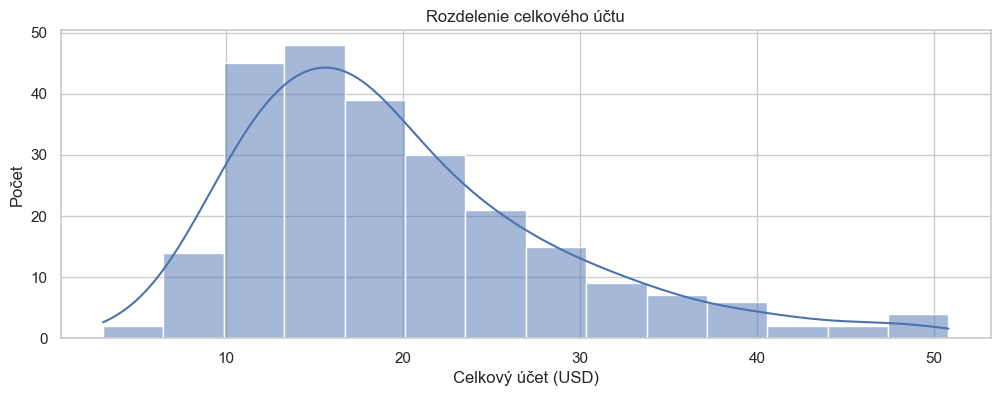

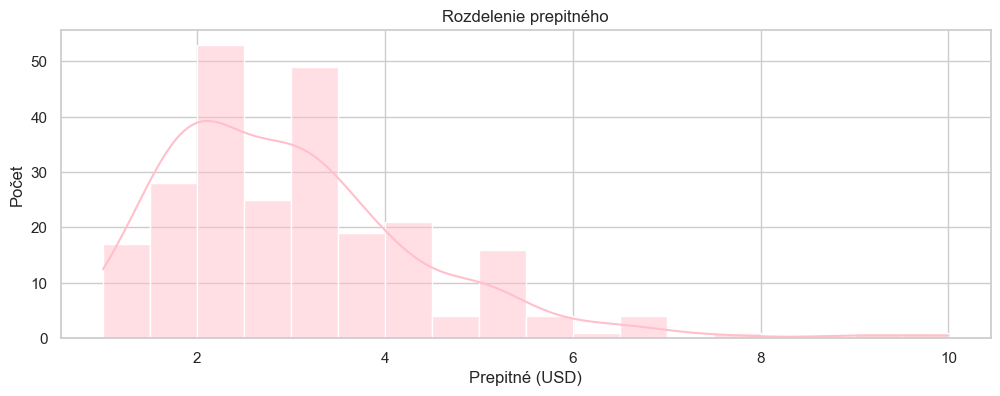

In [98]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,4))
sns.histplot(tips["total_bill"], kde=True)
plt.title("Rozdelenie celkového účtu")
plt.xlabel("Celkový účet (USD)")
plt.ylabel("Počet")
plt.show()

plt.figure(figsize=(12,4))
sns.histplot(tips["tip"], kde=True, color="pink")
plt.title("Rozdelenie prepitného")
plt.xlabel("Prepitné (USD)")
plt.ylabel("Počet")
plt.show()

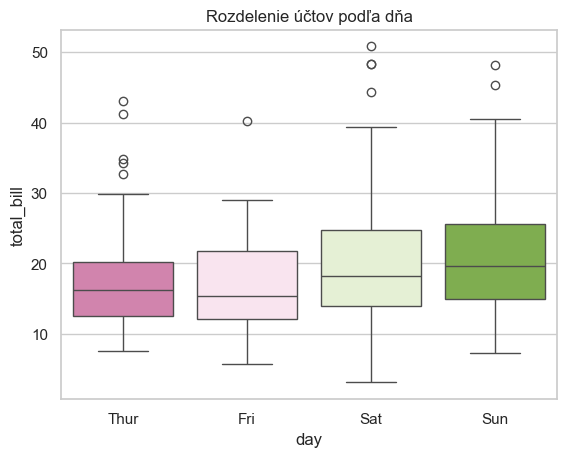

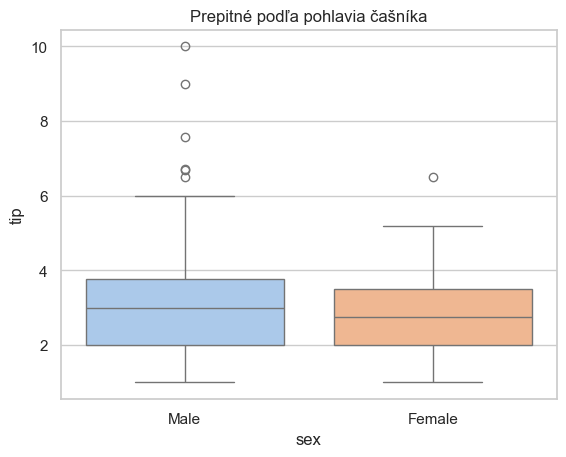

In [99]:
# porovnanie medzi jednotlivymi kategoriami
sns.boxplot(x="day", y="total_bill", data=tips, palette="PiYG", hue="day", legend=False)
plt.title("Rozdelenie účtov podľa dňa")
plt.show()

sns.boxplot(x="sex", y="tip", data=tips, palette="pastel", hue="sex", legend=False)
plt.title("Prepitné podľa pohlavia čašníka")
plt.show()


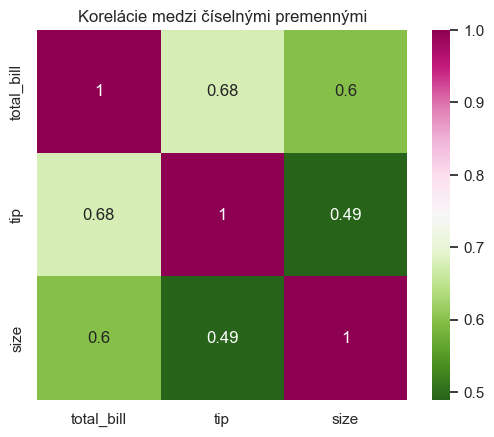

In [100]:
# korelácia medzi císelnymi premennymi

corr = tips.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="PiYG_r", square=True)
plt.title("Korelácie medzi číselnými premennými")
plt.show()

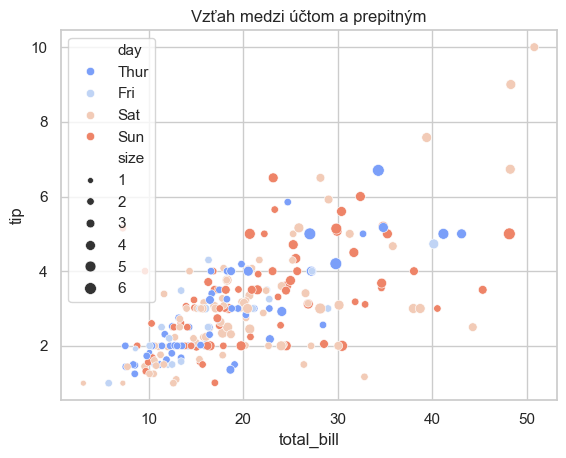

In [101]:
sns.scatterplot(x="total_bill", y="tip", hue="day", size="size", data=tips, palette="coolwarm")
plt.title("Vzťah medzi účtom a prepitným")
plt.show()

# Diamond dataset

In [102]:
df = pd.read_csv('data/diamonds.csv')
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [103]:
# koľko diamantov má každú farbu
df.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

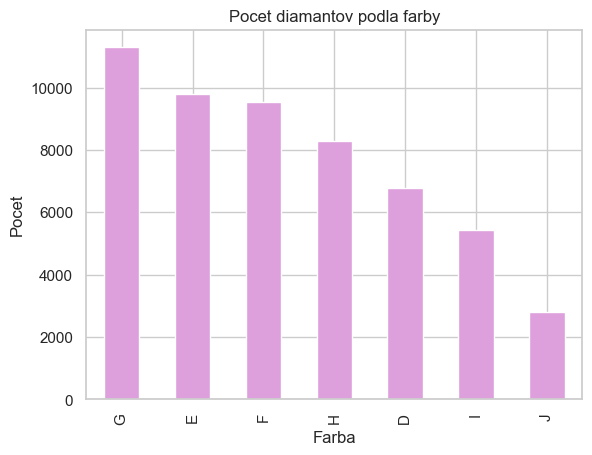

In [104]:
# bar - ukazuje pocet diamantov v kazdej kategorii
df.color.value_counts().plot(kind='bar', color='plum')
plt.title("Pocet diamantov podla farby")
plt.xlabel("Farba")
plt.ylabel("Pocet")
plt.show()

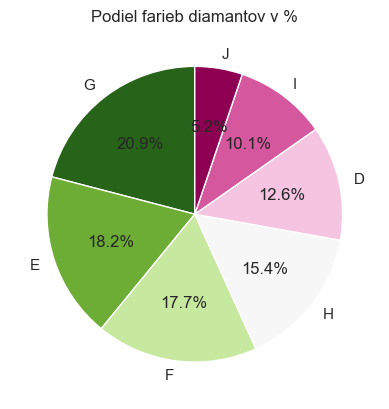

In [105]:
# pie - percentualne zastupenie farieb
df.color.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='PiYG_r')
plt.title("Podiel farieb diamantov v %")
plt.ylabel("")
plt.show()

**Your code:**
### 1. OVERVIEW

In [106]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 2. DESCRIPTIVE STATISTICS

In [107]:
df.shape

(53940, 11)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### 3. MISSING VALUES

In [109]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### 4. VISUAL EXPLORATION

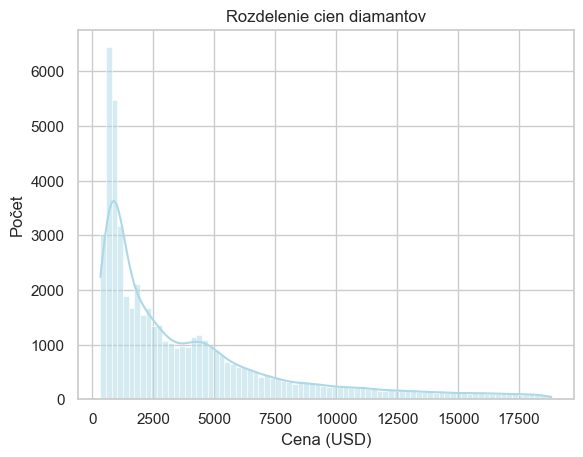

In [110]:
# distribucia ceny
sns.histplot(df['price'], kde=True, color='lightblue')
plt.title("Rozdelenie cien diamantov")
plt.xlabel("Cena (USD)")
plt.ylabel("Počet")
plt.show()

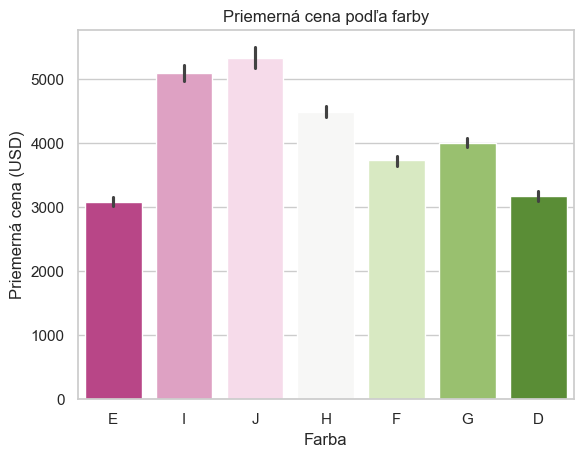

In [111]:
sns.barplot(x='color', y='price', data=df, palette='PiYG', hue='color')
plt.title("Priemerná cena podľa farby")
plt.xlabel("Farba")
plt.ylabel("Priemerná cena (USD)")
plt.show()

# Monitoring dataset

In [112]:
# nacitanie csv so standardnym oddelenim ciarkou

filename = 'data/monitoring.csv'
df = pd.read_csv(filename)
df.describe()

,1990-01-01\t16.000\t1\t18.000\t1\t21.000\t1\t26.000\t1\t21.000\t1\t19.000\t1\t19.000\t1\t16.000\t1\t15.000\t1\t13.000\t1\t12.000\t1\t16.000\t1\t-999.000\t0\t-999.000\t0\t19.000\t1\t26.000\t1\t23.000\t1\t23.000\t1\t28.000\t1\t41.000\t1\t32.000\t1\t21.000\t1\t23.000\t1\t25.000\t1
count,8396
unique,8396
top,1990-01-02\t19.000\t1\t22.000\t1\t22.000\t1\t2...
freq,1


In [113]:
data = pd.read_csv(filename, 
                   sep='\t', 
                   header=None, 
                   na_values=[-999, -9999], 
                   index_col=0)

**Your code:**

In [114]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,16.0,1,18.0,1,21.0,1,26.0,1,21.0,1,...,41.0,1,32.0,1,21.0,1,23.0,1,25.0,1
1990-01-02,19.0,1,22.0,1,22.0,1,25.0,1,28.0,1,...,59.0,1,58.0,1,52.0,1,40.0,1,36.0,1
1990-01-03,39.0,1,33.0,1,23.0,1,12.0,1,15.0,1,...,47.0,1,47.0,1,41.0,1,38.0,1,37.0,1
1990-01-04,49.0,1,52.0,1,55.0,1,57.0,1,58.0,1,...,45.0,1,43.0,1,42.0,1,32.0,1,23.0,1
1990-01-05,20.0,1,23.0,1,38.0,1,55.0,1,61.0,1,...,46.0,1,34.0,1,22.0,1,21.0,1,29.0,1


In [115]:
print(data.shape)

(8397, 48)


In [116]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8397 entries, 1990-01-01 to 2012-12-31
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       7352 non-null   float64
 1   2       8397 non-null   int64  
 2   3       7358 non-null   float64
 3   4       8397 non-null   int64  
 4   5       7347 non-null   float64
 5   6       8397 non-null   int64  
 6   7       7323 non-null   float64
 7   8       8397 non-null   int64  
 8   9       7308 non-null   float64
 9   10      8397 non-null   int64  
 10  11      7286 non-null   float64
 11  12      8397 non-null   int64  
 12  13      7211 non-null   float64
 13  14      8397 non-null   int64  
 14  15      7134 non-null   float64
 15  16      8397 non-null   int64  
 16  17      7070 non-null   float64
 17  18      8397 non-null   int64  
 18  19      7013 non-null   float64
 19  20      8397 non-null   int64  
 20  21      6982 non-null   float64
 21  22      8397 non-null   int

In [117]:
data.isnull().sum()

1     1045
2        0
3     1039
4        0
5     1050
6        0
7     1074
8        0
9     1089
10       0
11    1111
12       0
13    1186
14       0
15    1263
16       0
17    1327
18       0
19    1384
20       0
21    1415
22       0
23    1372
24       0
25    1277
26       0
27    1192
28       0
29    1109
30       0
31    1021
32       0
33     973
34       0
35     957
36       0
37     961
38       0
39     960
40       0
41     971
42       0
43     960
44       0
45     980
46       0
47    1005
48       0
dtype: int64

In [118]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
count,7352.000000,8397.000000,7358.000000,8397.000000,7347.000000,8397.000000,7323.000000,8397.000000,7308.000000,8397.000000,...,7437.000000,8397.000000,7426.000000,8397.000000,7437.000000,8397.000000,7417.000000,8397.000000,7392.000000,8397.000000
mean,17.465044,0.867453,17.048383,0.869596,16.612699,0.868524,16.376212,0.865428,16.319787,0.863642,...,19.837098,0.879600,19.996499,0.877933,19.498319,0.879481,18.773156,0.876504,18.000271,0.873764
std,13.568952,0.362202,13.201900,0.356022,12.699075,0.356464,12.372273,0.360300,11.930001,0.362103,...,15.409837,0.343606,15.499338,0.346472,15.232618,0.344084,14.679122,0.349050,14.046324,0.351304
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000
25%,7.000000,1.000000,7.000000,1.000000,7.000000,1.000000,7.000000,1.000000,7.000000,1.000000,...,8.000000,1.000000,8.000000,1.000000,8.000000,1.000000,8.000000,1.000000,7.000000,1.000000
50%,13.000000,1.000000,13.000000,1.000000,12.500000,1.000000,12.000000,1.000000,13.000000,1.000000,...,15.000000,1.000000,15.000000,1.000000,14.000000,1.000000,14.000000,1.000000,13.000000,1.000000
75%,25.000000,1.000000,24.000000,1.000000,23.000000,1.000000,23.000000,1.000000,23.000000,1.000000,...,29.000000,1.000000,29.000000,1.000000,28.000000,1.000000,27.000000,1.000000,26.000000,1.000000
max,77.000000,1.000000,97.000000,1.000000,106.000000,1.000000,83.000000,1.000000,97.000000,1.000000,...,113.000000,1.000000,91.000000,1.000000,97.000000,1.000000,94.000000,1.000000,102.000000,1.000000


In [119]:
data.corr()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
1,1.000000,NaN,0.951708,-0.003619,0.889664,-0.005739,0.839001,0.002744,0.792678,0.003021,...,0.492485,-0.019091,0.479267,0.002446,0.475803,0.008129,0.464570,0.009342,0.454972,0.001784
2,NaN,1.000000,-0.018837,0.595615,-0.005431,0.505217,-0.009553,0.497606,-0.008412,0.486966,...,-0.012867,0.333034,-0.016020,0.332314,-0.011702,0.332444,-0.006958,0.399960,0.000653,0.579875
3,0.951708,-0.018837,1.000000,NaN,0.947198,0.003466,0.886797,0.008406,0.835357,0.003857,...,0.494729,-0.022080,0.480052,0.007751,0.479322,0.008353,0.468600,0.005000,0.461431,-0.003912
4,-0.003619,0.595615,NaN,1.000000,0.002852,0.610058,-0.000649,0.511278,0.001527,0.505078,...,-0.014033,0.339951,-0.010300,0.344066,0.000837,0.343241,-0.002944,0.341942,0.000767,0.410218
5,0.889664,-0.005431,0.947198,0.002852,1.000000,NaN,0.950192,0.009638,0.887956,0.000121,...,0.497652,-0.018890,0.480744,0.009892,0.476434,0.000960,0.465862,0.004446,0.461128,0.000725
6,-0.005739,0.505217,0.003466,0.610058,NaN,1.000000,-0.000267,0.609676,0.005343,0.507010,...,-0.012543,0.336531,-0.015508,0.338723,-0.004290,0.336907,-0.002438,0.336626,-0.000154,0.327785
7,0.839001,-0.009553,0.886797,-0.000649,0.950192,-0.000267,1.000000,NaN,0.948675,-0.006351,...,0.500805,-0.012038,0.488103,0.013932,0.483170,0.000099,0.471642,-0.001352,0.469704,-0.003449
8,0.002744,0.497606,0.008406,0.511278,0.009638,0.609676,NaN,1.000000,0.004871,0.606100,...,-0.009274,0.334747,-0.004967,0.334951,0.001250,0.335114,0.002929,0.335683,0.004594,0.325912
9,0.792678,-0.008412,0.835357,0.001527,0.887956,0.005343,0.948675,0.004871,1.000000,NaN,...,0.520815,-0.013880,0.506637,0.005750,0.500068,-0.004797,0.490277,-0.009170,0.486654,-0.006411
10,0.003021,0.486966,0.003857,0.505078,0.000121,0.507010,-0.006351,0.606100,NaN,1.000000,...,-0.012430,0.339967,-0.013036,0.340089,-0.000506,0.339364,-0.001605,0.338863,0.008688,0.329070
